# My mood in 2021 (According to Spotify)
## To get the data: 
## https://towardsdatascience.com/get-your-spotify-streaming-history-with-python-d5a208bbcbd3

In [1]:
from collections import namedtuple
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

sns.set(font='georgia')
sns.set_style("ticks")

In [2]:
df = pd.read_csv('output/final.csv', index_col = 0)
df.shape

(16679, 26)

In [3]:
#tracks playing time
df['secPlayed'] = df['msPlayed'] / 1000
df = df[df.columns[:-1].insert(4, df.columns[-1])] #moving seconds column to proper place
df = df[df.secPlayed > 60] #removing songs that were played for less than 60 secs
df.shape

(12429, 27)

In [4]:
# cleaning name column
df['name'] = df['name'].str.extract(r'^(.*?)_')

In [5]:
#identifying the month
df['month'] = df.endTime.str.split('-').apply(lambda x: (x[0], x[1]))

In [6]:
#listing months and features
months = list(set(df.month.values))
months.sort()


features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence']

In [7]:
#standardizing features (we're interested not in their absolute value, but in how each changed over time)
for feature in features:
    df[f'{feature}_zscore'] = ( df[feature] - df[feature].mean() ) / df[feature].std()

In [8]:
#making sure we standardized correctly: mean is 0 and std is 1
df[[feature + '_zscore' for feature in features]].describe().loc['mean':'std'].T

,mean,std
danceability_zscore,5.319638e-15,1.0
energy_zscore,1.808044e-14,1.0
key_zscore,-4.053064e-16,1.0
loudness_zscore,-2.642565e-14,1.0
mode_zscore,-6.246333e-16,1.0
speechiness_zscore,-9.678297e-16,1.0
acousticness_zscore,-3.879742e-15,1.0
instrumentalness_zscore,-3.180549e-15,1.0
liveness_zscore,-1.856091e-14,1.0
valence_zscore,7.247178e-15,1.0


In [9]:
#features averages by month
Month = namedtuple('Month', features)
avg_features_months = []
for month in months:
    df_month = df[df['month'] == month]
    avg_features = df_month.describe().loc['mean'][[feature + '_zscore' for feature in features]]
    month = Month(*avg_features)
    avg_features_months.append(month)

In [10]:
#labelling months
month_labels = [f'{month[1]}/{month[0]}' for month in months]
month_labels_short = [m[:3]+m[-2:] for m in month_labels]

In [11]:
def features_sns(features):
    fig, ax = plt.subplots(figsize = (25,10))
    x = [x for x in range(13)]

    for feature in features:
        y = [getattr(month, feature) for month in avg_features_months]
        fig = sns.lineplot(x,y, label=feature, linewidth=6, alpha=.7, marker='o', markersize=15)
    
    ax.set_xticks([x for x in range(13)])
    ax.set_xticklabels(labels=month_labels_short, rotation=45, ha='right', size=30)

    for tick in ax.yaxis.get_major_ticks():
                tick.label.set_fontsize(30) 

    leg = ax.legend(loc = 'upper left', bbox_to_anchor=(1,1.03), prop={'size': 30})

    # get the individual lines inside legend and set line width
    for line in leg.get_lines():
        line.set_linewidth(10)
    
    ax.set_title('My mood in 2021 (According to Spotify)', size = 50, pad = 30, fontname = 'sans-serif')

    return ax

/Users/anyabhatnagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anyabhatnagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/anyabhatnagar/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error o

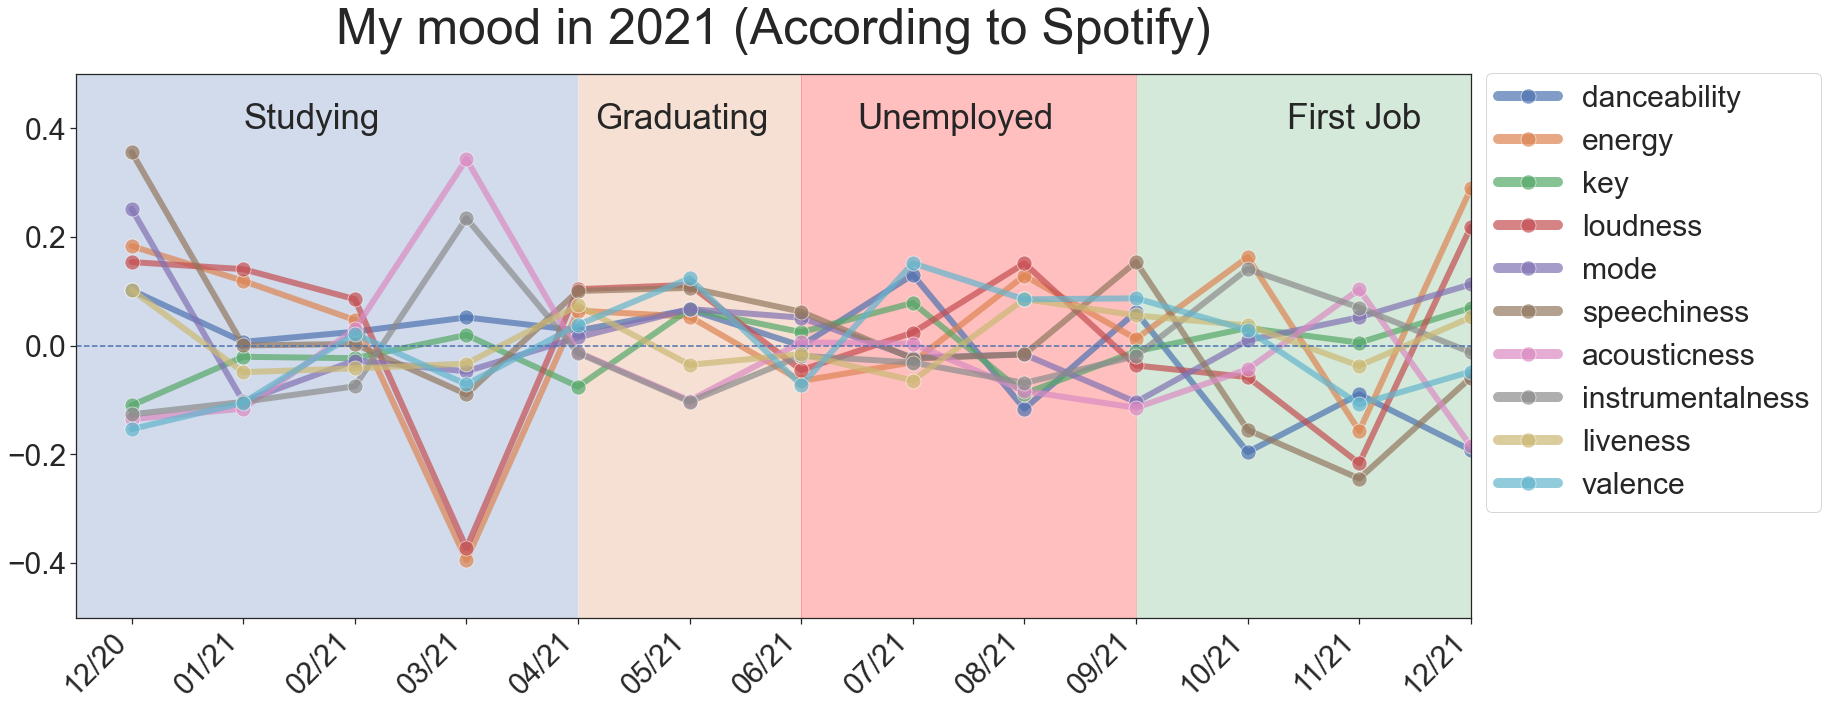

In [12]:
features_sns(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence'])
x = [-1] + [x for x in range(13)]
alpha = .25
plt.ylim([-.5, .5])
plt.xlim([-.5, 12])

plt.fill_between(x[:6], -.5, 0.5, alpha=alpha)
plt.fill_between(x[5:8], -.5, 0.5, alpha=alpha)
plt.fill_between(x[7:11], -.5, 0.5, alpha=alpha, color="red")
plt.fill_between(x[10:], -.5, 0.5, alpha=alpha)

plt.annotate('Studying', (1, 0.4), size=35)
plt.annotate('Graduating', (4.15, 0.4), size=35,)
plt.annotate('Unemployed', (6.5, 0.4), size=35,)
plt.annotate('First Job', (10.35, 0.4), size=35,)

plt.axhline(y=0, color='b', linestyle='--')


plt.show()

In [13]:
# munging 
columns = ["artistName", "trackName", "secPlayed", "datetime", "danceability", "energy", "key", "loudness",
          "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "type", 
          "time_signature", "albumName"]
dfquaeris = df[columns]
dfquaeris.head()

,artistName,trackName,secPlayed,datetime,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,time_signature,albumName
0,Ricky Montgomery,Line Without a Hook,169.476,2020-12-18 23:00:00,0.432,0.652,8.0,-4.969,1.0,0.0285,0.262,0.0,0.258,0.507,190.028,audio_features,3.0,Montgomery Ricky
2,Ricky Montgomery,Line Without a Hook,248.191,2020-12-19 06:02:00,0.432,0.652,8.0,-4.969,1.0,0.0285,0.262,0.0,0.258,0.507,190.028,audio_features,3.0,Montgomery Ricky
3,Ricky Montgomery,Line Without a Hook,249.587,2020-12-19 06:08:00,0.432,0.652,8.0,-4.969,1.0,0.0285,0.262,0.0,0.258,0.507,190.028,audio_features,3.0,Montgomery Ricky
4,Ricky Montgomery,Line Without a Hook,356.668,2020-12-19 06:23:00,0.432,0.652,8.0,-4.969,1.0,0.0285,0.262,0.0,0.258,0.507,190.028,audio_features,3.0,Montgomery Ricky
5,Ricky Montgomery,Line Without a Hook,249.587,2020-12-19 06:27:00,0.432,0.652,8.0,-4.969,1.0,0.0285,0.262,0.0,0.258,0.507,190.028,audio_features,3.0,Montgomery Ricky


In [14]:
dfquaeris.to_csv("output_dfquaeris.csv", sep='|', na_rep='', header=False,
index=False, index_label=False, mode='w', encoding=None, compression=None, quoting=csv.QUOTE_NONNUMERIC,
quotechar='^', date_format='%Y-%m-%dT%H:%M:%S.%f', doublequote=False,
escapechar=";", decimal='.', errors='strict')